# S&P Finance Example

#### This below code is going to help to do the following steps

- Fetching data from a website to collect the S&P company 
- Retrieve all the financial data from 2000 to 13-Sep-2019 (today)
- Plot them in a heatmap 

In [47]:
#This method is retrive all the S&P 500 Company tickers to get the realtime stock values
# Beautiful Soup helps to do web scrapping
import bs4 as bs
import pickle 
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    # The acutaly data resided in website table with below HTML class
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    # Interating throw all HTML table row
    for row in table.findAll('tr')[1:]:
        #Fetching first column which is having Tricker code for each company
        ticker = row.findAll('td')[0].text
        ticker = ticker.strip('\n')
        ticker = ticker.replace('.', '')
        tickers.append(ticker)
    with open('data/sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers,f)
    print(tickers) 
    return tickers

#save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', '(notvalidinformation) GOOGL (notvalidinformation)', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRKB', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BFB', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO'

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 '(notvalidinformation) GOOGL (notvalidinformation)',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRKB',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BFB',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 

In [29]:
#This method and imports is to fetch all the data form Yahoo Stock website form Start data to end data

import datetime as dt
import os
import pandas as pd
import pandas_datareader as web


def get_data_from_yahoo(reload_sp500=False, reload_data=False):
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('data/sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2019, 12, 31)
    
    for ticker in tickers:
        #print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

            
#get_data_from_yahoo()

MMM
Already have ['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRKB', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BFB', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'C

BBY
BIIB
BLK
HRB
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BFB
CHRW
COG
CDNS
CPB
COF
CPRI
CAH
KMX
CCL
CAT
CBOE
CBRE
CBS
CE
CELG
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HAL
HBI
HOG
HIG
HAS
HCA
HCP
HP
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRL
HST
HPQ
HUM
HBAN
HII
IEX
IDXX
INFO
ITW
ILMN
IR
INTC
ICE
IBM
INCY
IP
IPG
IFF
INTU
ISRG
IVZ
IPGP
IQV
IRM
JKHY
JEC
JBHT
JEF
SJM
JNJ
JCI
JPM
JNPR
KSU
K
KEY
KEYS
KMB
KIM
KMI
KLAC
KSS
KHC
KR
LB
LHX
LH
LRCX
LW
LEG
LDOS
LEN
LLY
LNC
LIN
LKQ
LMT
L
LOW
LYB
MTB
MAC
M
MRO
MPC
MKTX
MAR
MMC
MLM
MAS
MA
MKC
MXIM
MCD

In [34]:
def compile_data():
    with open('data/sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    main_df = pd.DataFrame()
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        df.rename(columns = {'Adj Close': ticker}, inplace = True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_df.empty :
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0:
            print(count)
    
    print(main_df.head())
    main_df.to_csv('data/sp500_joined_closes.csv')
#compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
1999-12-31  27.810062  6.896002   NaN  18.37500  NaN  1.151060  16.693562   
2000-01-03  26.815578  6.646748   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.750059  6.456838   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.495914  6.444972   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.626963  6.670486   NaN  18.03125  NaN  1.179249  15.328290   

                 AMD  AAP        AES  ...  WLTW  WYNN       XEL        XRX  \
Date                                  ...                                    
1999-12-31  14.46875  NaN  29.915319  ...   NaN   NaN  8.096432  50.074444   
2000-01-03  15.50000  NaN  29.014

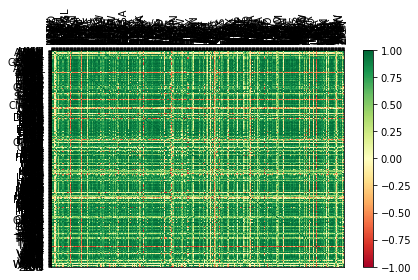

In [48]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#style.use('nbagg')

def visualize_data():
    df = pd.read_csv('data/sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    #print(df_corr)
    
    data= df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
visualize_data()